<a href="https://colab.research.google.com/github/Girish-yml/notebooks/blob/main/SentimentAnalyser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Utility

In [41]:
!pip install huggingface_hub
!pip install torch
!pip install cryptography
!pip install psutil

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
1844.27s - pydevd: Sending message related to process being replaced timed-out after 5 seconds

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
1851.04s - pydevd: Sending message related to process being replaced timed-out after 5 seconds

[notice] A new release of pip is a

In [42]:
# %%writefile app.py

""" A Utility calss which contains most commonly used functions """

import huggingface_hub
import huggingface_hub.hf_api
import psutil
import torch
import functools
import socket
import cryptography
import cryptography.fernet
import os

class Utility(object):

  def __init__(self, name="Utility") -> None:
    self.name = name
    self.author = "Duc Haba, Girish"
    self._pp("Hello from class", str(self.__class__) + " Class: " + str(self.__class__.__name__))
    self._pp("Code name", self.name)

    #Define encrypted keys
    self._huggingface_key="gAAAAABkgtmOIjpnjwXFWmgh1j2et2kMjHUze-ym6h3BieAp34Sqkqv3EVYvRinETvpw-kXu7RSRl5_9FqrYe-7unfakMvMkU8nHrfB3hBSC76ZTXwkVSzlN0RfBNs9NL8BGjaSJ8mz8"

    #Key for crypto
    self._fkey=os.getenv("hf_encrypt_decrypt_key")
    return

  # Print : Pretty print output name-value line
  def _pp(self, a, b,is_print=True):
    # print("%34s : %s" % (str(a), str(b)))
    x = f'{"%34s" % str(a)} : {str(b)}'
    y = None
    if (is_print):
      print(x)
    else:
      y = x
    return y

  # Print : Pretty print the header or footer lines
  def _ph(self,is_print=True):
    x = f'{"-"*34} : {"-"*34}'
    y = None
    if (is_print):
      print(x)
    else:
      y = x
    return y

  # Hugging face : Login to Hugging face
  def _login_hface(self):
    huggingface_hub.login(self._decrypt_it(self._huggingface_key),
      add_to_git_credential=True) # non-blocking login
    self._ph()
    return

  # Hugging face : Push files to Hugging face
  def push_hface_files(self,
    hf_names,
    hf_space="GirishKiran/yml",
    local_dir="/content/"):
    f = str(hf_names) + " is not iteratable, type: " + str(type(hf_names))
    try:
      for f in hf_names:
        lo = local_dir + f
        huggingface_hub.upload_file(
          path_or_fileobj=lo,
          path_in_repo=f,
          repo_id=hf_space,
          repo_type=huggingface_hub.REPO_TYPE_SPACE)
    except Exception as e:
      self._pp("*Error", e)
    return

  # Hugging face : Push folders to Hugging face
  def push_hface_folder(self, hf_folder, hf_space_id, hf_dest_folder=None):
    api = huggingface_hub.HfApi()
    api.upload_folder(folder_path=hf_folder,
      repo_id=hf_space_id,
      path_in_repo=hf_dest_folder,
      repo_type="space")
    return

  # Hugging face : Login to Hugging face
  def _login_hface(self):
    huggingface_hub.login(self._decrypt_it(self._huggingface_key),
      add_to_git_credential=True) # non-blocking login
    self._ph()
    return

  # System Info : Fetch available CPU and RAM of the system
  def fetch_system_info(self):
    s=''
    # Get CPU usage as a percentage
    cpu_usage = psutil.cpu_percent()
    # Get available memory in bytes
    mem = psutil.virtual_memory()
    # Convert bytes to gigabytes
    mem_total_gb = mem.total / (1024 ** 3)
    mem_available_gb = mem.available / (1024 ** 3)
    mem_used_gb = mem.used / (1024 ** 3)
    # Print the results
    s += f"CPU usage: {cpu_usage}%\n"
    s += f"Total memory: {mem_total_gb:.2f} GB\n"
    s += f"Available memory: {mem_available_gb:.2f} GB\n"
    # print(f"Used memory: {mem_used_gb:.2f} GB")
    s += f"Memory usage: {mem_used_gb/mem_total_gb:.2f}%\n"
    return

  # System Info : Fetch GPU information of the system
  def fetch_gpu_info(self):
    s=''
    try:
      s += f'Your GPU is the {torch.cuda.get_device_name(0)}\n'
      s += f'GPU ready staus {torch.cuda.is_available()}\n'
      s += f'GPU allocated RAM: {round(torch.cuda.memory_allocated(0)/1024**3,1)} GB\n'
      s += f'GPU reserved RAM {round(torch.cuda.memory_reserved(0)/1024**3,1)} GB\n'
    except Exception as e:
      s += f'**Warning, No GPU: {e}'
    return s

  # System Info : Fetch host ip address
  def fetch_host_ip(self):
    s=''
    hostname = socket.gethostname()
    ip_address = socket.gethostbyname(hostname)
    s += f"Hostname: {hostname}\n"
    s += f"IP Address: {ip_address}\n"
    return s

  # Create and writes data to the file
  def write_file(self,fname, txt):
    f = open(fname, "w")
    f.writelines("\n".join(txt))
    f.close()
    return

  # Crypto : Fetch crypto key
  def _fetch_crypt(self,is_generate=False):
    s=self._fkey[::-1]
    if (is_generate):
      s=open(self._xkeyfile, "rb").read()
    return s

  # Crypto : Decrypt value
  def _decrypt_it(self, x):
    y = self._fetch_crypt()
    f = cryptography.fernet.Fernet(y)
    m = f.decrypt(x)
    return m.decode()

  # Crypto : Encrypt value
  def _encrypt_it(self, x):
    key = self._fetch_crypt()
    p = x.encode()
    f = cryptography.fernet.Fernet(key)
    y = f.encrypt(p)
    return y

  # Capitalizes the first letter of each word in a list.
  def capitalize_first_letter(self, list_of_words):
    capitalized_words = []
    for word in list_of_words:
      capitalized_word = word[0].upper() + word[1:]
      capitalized_words.append(capitalized_word)
    return capitalized_words
  
# Add method to class
def add_method(cls):
  def decorator(func):
    @functools.wraps(func)
    def wrapper(*args, **kwargs):
      return func(*args, **kwargs)
    setattr(cls, func.__name__, wrapper)
    return func # returning func means func can still be used normally
  return decorator


# Sentiment

In [43]:
!pip install transformers
!pip install scipy
!pip install line_profiler
!pip install git+https://github.com/openai/whisper.git

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
1870.82s - pydevd: Sending message related to process being replaced timed-out after 5 seconds

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
1877.59s - pydevd: Sending message related to process being replaced timed-out after 5 seconds

[notice] A new release of pip is a

In [44]:
# %%writefile -a app.py

""" This file contains multiple Python classes and responssible to provide Emotions based on the given user input
    Currently it supports emotions like Anger, Joy, Optimism and Sadness"""

from transformers import AutoTokenizer, AutoModelForSequenceClassification
from  matplotlib.colors import LinearSegmentedColormap
import scipy
import scipy.special
import pandas
import whisper

class SentimentAnalyser(object):

  # initialize the object
  def __init__(self, name="Sentiment",*args, **kwargs):
    super(SentimentAnalyser, self).__init__(*args, **kwargs)
    self.author = "Duc Haba, Girish"
    self.name = name
    utility = Utility(name="Calling From SentimentAnalyser")
    self.utility = utility
    utility._ph()
    utility._pp("Hello from class", str(self.__class__) + " Class: " + str(self.__class__.__name__))
    utility._pp("Code name", self.name)
    utility._pp("Author is" , self.author)
    utility._ph()
    print(utility.fetch_system_info())
    utility._ph()
    # print(utility.fetch_gpu_info())
    utility._ph()
    # print(utility.fetch_host_ip())
    utility._ph()
    self._init_model()
    utility._login_hface()
    return

  # initalise the model
  def _init_model(self):
    modelLink = "bhadresh-savani/distilbert-base-uncased-emotion" #"SamLowe/roberta-base-go_emotions"
    self.tokenizer = AutoTokenizer.from_pretrained(modelLink)
    self.model = AutoModelForSequenceClassification.from_pretrained(modelLink)
    self.whisper_model = whisper.load_model("small")
    return

sentiment = SentimentAnalyser(name="EmotionAnalyser")

                  Hello from class : <class '__main__.Utility'> Class: Utility
                         Code name : Calling From SentimentAnalyser
---------------------------------- : ----------------------------------
                  Hello from class : <class '__main__.SentimentAnalyser'> Class: SentimentAnalyser
                         Code name : EmotionAnalyser
                         Author is : Duc Haba, Girish
---------------------------------- : ----------------------------------
None
---------------------------------- : ----------------------------------
---------------------------------- : ----------------------------------
---------------------------------- : ----------------------------------


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /var/folders/4g/mcchzzn55cn02l9k04dtctvh0000gp/T/ipykernel_24721/3386481157.py:45 in <module>    │
│                                                                                                  │
│ [Errno 2] No such file or directory:                                                             │
│ '/var/folders/4g/mcchzzn55cn02l9k04dtctvh0000gp/T/ipykernel_24721/3386481157.py'                 │
│                                                                                                  │
│ /var/folders/4g/mcchzzn55cn02l9k04dtctvh0000gp/T/ipykernel_24721/3386481157.py:34 in __init__    │
│                                                                                                  │
│ [Errno 2] No such file or directory:                                                             │
│ '/var/folders/4g/mcchzzn55cn02l9k04dtctvh0000gp/T/ipykernel_24721/3386481157.py'                 │
│                                                                                                  │
│ /var/folders/4g/mcchzzn55cn02l9k04dtctvh0000gp/T/ipykernel_24721/774474202.py:87 in _login_hface │
│                                                                                                  │
│ [Errno 2] No such file or directory:                                                             │
│ '/var/folders/4g/mcchzzn55cn02l9k04dtctvh0000gp/T/ipykernel_24721/774474202.py'                  │
│                                                                                                  │
│ /var/folders/4g/mcchzzn55cn02l9k04dtctvh0000gp/T/ipykernel_24721/774474202.py:148 in _decrypt_it │
│                                                                                                  │
│ [Errno 2] No such file or directory:                                                             │
│ '/var/folders/4g/mcchzzn55cn02l9k04dtctvh0000gp/T/ipykernel_24721/774474202.py'                  │
│                                                                                                  │
│ /var/folders/4g/mcchzzn55cn02l9k04dtctvh0000gp/T/ipykernel_24721/774474202.py:141 in             │
│ _fetch_crypt                                                                                     │
│                                                                                                  │
│ [Errno 2] No such file or directory:                                                             │
│ '/var/folders/4g/mcchzzn55cn02l9k04dtctvh0000gp/T/ipykernel_24721/774474202.py'                  │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
TypeError: 'NoneType' object is not subscriptable

In [45]:
# %%writefile -a app.py

@add_method(SentimentAnalyser)
def _predict_sentiment(p):
  # Tokenize input
  inputs = sentiment.tokenizer(p, return_tensors="pt")
  # Pass inputs through model
  outputs = sentiment.model(**inputs)
  # sentiment_map = sentiment.utility.capitalize_first_letter(sentiment.model.config.label2id.keys())
  out_data = outputs[0][0]
  scores = out_data.detach().numpy()
  scores = scipy.special.softmax(scores)
  sentiment_map = ['Sadness', 'Joy', 'Love', 'Anger', 'Fear' , "Surprise"]
  df_out = pandas.DataFrame([scores], columns=sentiment_map)
  df_out = df_out[['Love' , 'Joy', 'Surprise' , 'Fear', 'Sadness', 'Anger']]
  return df_out
  
@add_method(SentimentAnalyser)
def draw_bar_plot(df_data, title='Sentiment Analysis', xlabel='p string', ylabel='Emotion Score'):
  graphCmap=LinearSegmentedColormap.from_list('gr',["g", "w", "r"])
  pic = df_data.plot.bar(cmap=graphCmap,
        title=title,
        ylabel=ylabel,
        xlabel=xlabel,
        grid=True)
  return pic

@add_method(SentimentAnalyser)
def inference(audio):
  audio = whisper.load_audio(audio)
  audio = whisper.pad_or_trim(audio)

  mel = whisper.log_mel_spectrogram(audio).to(sentiment.whisper_model.device)

  _, probs = sentiment.whisper_model.detect_language(mel)

  options = whisper.DecodingOptions(fp16 = False)
  result = whisper.decode(sentiment.whisper_model, mel, options)

  print(result.text)
  return result.text
  
@add_method(SentimentAnalyser)
def predict_sentiment(input_text, input_audio = None, audio_text_btn = None):
  df_out = _predict_sentiment(input_text)
  max_column = df_out.loc[0].idxmax()
  max_value = df_out.loc[0].max()
  title = f'Sentiment Analysis: {max_column}: {round(max_value*100,1)}%'
  xlabel= f'Input: {input_text}'
  pic = draw_bar_plot(df_out, title=title, xlabel=xlabel)
  return pic.get_figure(), df_out.to_json()

# Verification

In [46]:
sentences = [
    "I love you more than words can say.",
    "I'm so in love with you, it makes me feel like I could fly.",
    "The way you look at me makes my heart melt.",
    "I can't imagine my life without you.",
    "You're the love of my life.",
    "I'm so angry I could spit!",
    "I'm going to explode!",
    "How dare you do that to me?",
    "I'm so furious, I can't even think straight.",
    "I'm so mad, I could punch a wall.",
    "I'm so sad, I could cry.",
    "I feel like my heart is breaking.",
    "I'm so depressed, I don't know what to do.",
    "I'm so lonely, I could die.",
    "I'm so sad, I just want to curl up in a ball and disappear.",
    "I'm so happy, I could burst!",
    "I'm so excited, I can't sit still.",
    "I'm so thrilled, I could scream.",
    "I'm so happy, I could kiss the world.",
    "I'm so joyful, I could dance all day.",
    "I'm so surprised, I don't know what to say.",
    "I'm so shocked, I think I'm going to faint.",
    "I'm so surprised, I'm speechless.",
    "I'm so surprised, I could cry.",
    "I'm so surprised, I'm going to need a minute to process this.",
    "I'm so scared, I can't breathe.",
    "I'm so afraid, I'm shaking.",
    "I'm so terrified, I think I'm going to pass out.",
    "I'm so scared, I don't know what to do.",
    "I'm so afraid, I'm going to die.",
    "She is scared",
]

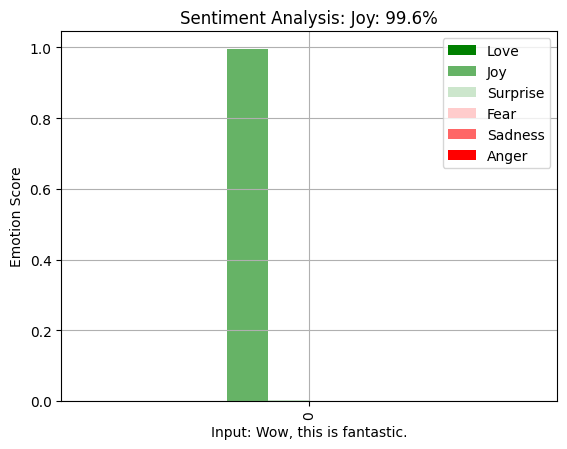

In [47]:
# x,y = predict_sentiment("""Predict the emotions as Love, Joy, Surprise, Fear, Sadness, or Anger for the sentence.: I'm so happy, I could burst! """)
x,y = predict_sentiment("Wow, this is fantastic.")

In [48]:
# Test the function
%%time
for sentence in sentences:
    x,y = predict_sentiment("""Predict the emotions as Love, Joy, Surprise, Fear, Sadness, or Anger for the sentence.: ${sentence} """)
    print(y)

# CPU times: user 5.92 s, sys: 1.13 s, total: 7.05 s
# Wall time: 1.85 s

UsageError: Line magic function `%%time` not found.


# Gradio UI

In [49]:
!pip install gradio

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
1907.44s - pydevd: Sending message related to process being replaced timed-out after 5 seconds

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [50]:
# %%writefile -a app.py

import gradio
whisper_audio = gradio.Audio(label="Audio Input",
                    source="microphone",
                    type="filepath")
whisper_button = gradio.Button("Convert Audio to Text")
input_text = gradio.Textbox(lines=1, label="Text Input", placeholder="type text here")

in_box = [input_text,whisper_audio,whisper_button]
out_box = [gradio.Plot(label="Sentiment Score:"),
  gradio.Textbox(lines=4, label="Raw JSON Response:")]

title = "Sentiment Analysis: Understanding the Emotional Tone of Text"
desc = "Sentiment analysis is a powerful tool that can be used to gain insights into how people feel about the world around them."
exp = [
  ['I am feeling very bad today.'],
  ['I hate to swim early morning.']
 ]
arti= "<b>DistilBERT is 27 times faster than OpenAI, making it the clear winner for speed-sensitive applications.</b>\n\nWe did a comparision of OpenAI vs DestilBert model (which we are currently using in this space) by running 31 sentences in a loop and found DestilBert is 27 times faster than OpenAI."

In [51]:
# %%writefile -a app.py

with gradio.Interface(fn=predict_sentiment,
  inputs=in_box,
  outputs=out_box,
  title=title,
  description=desc,
  examples=exp,
  article=arti) as demo:
    with gradio.Blocks() as block:
      whisper_button.click(inference, inputs=[whisper_audio], outputs=[input_text])
demo.launch(debug=True)


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


Keyboard interruption in main thread... closing server.


# Uploading to Hugging face

## Create requirment.txt

In [ ]:
# create the requirements.txt file
txt = ["huggingface_hub", "torch",
  "transformers", "scipy", "gradio", "cryptography", "psutil", "git+https://github.com/openai/whisper.git"]
sentiment.utility.write_file("requirements.txt", txt)

In [ ]:
# optional double check it
!cat requirements.txt

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
1149.22s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
huggingface_hub
torch
transformers
scipy
gradio
cryptography
psutil
git+https://github.com/openai/whisper.git

In [ ]:
sentiment.hface_space = 'GirishKiran/sentiment'
up_files = ["./app.py", "./requirements.txt"]
sentiment.utility.push_hface_files(up_files, hf_space=sentiment.hface_space, local_dir='')

# API

## Post

In [ ]:
import requests

end_point = 'https://girishkiran-sentiment.hf.space/run/predict'
response = requests.post(end_point, json={
  "data": [
    "I hate to swim early morning.",
]}).json()

data = response["data"]
print(data[1])

{"Sadness":{"0":0.0234352797},"Joy":{"0":0.1141998619},"Love":{"0":0.0036023685},"Anger":{"0":0.0805795714},"Fear":{"0":0.7764459848},"Surprise":{"0":0.0017369982}}


## Python

In [ ]:
!pip install gradio_client

In [ ]:
from gradio_client import Client

client = Client("https://girishkiran-sentiment.hf.space/")
result = client.predict(
				"I hate to swim early morning.",
				api_name="/predict"
)
print(result[1])


Loaded as API: https://girishkiran-sentiment.hf.space/ ✔
{"Sadness":{"0":0.0151823629},"Joy":{"0":0.1143344864},"Love":{"0":0.0031632562},"Anger":{"0":0.7523047328},"Fear":{"0":0.0804230794},"Surprise":{"0":0.0345920473}}


# Scratch pad

In [ ]:
import gradio

md='models/bhadresh-savani/distilbert-base-uncased-emotion'
t='Maggie: YML Hackathon Image Generation'
d='This space is for the YML Hackathon. The API link is on the bottom of the page.'
a = f'Note: The underline model is the Stable Diffusion: {md}'
gradio.load(md,title=t,description=d,article=a).launch(share=True)

##  OpenAI

In [ ]:
!pip install openai
!pip install xformers
!pip install line_profiler

In [ ]:
import openai

openai.api_key = sentiment.utility._decrypt_it("key-goes-here")


b'gAAAAABklYjgIeYBFYqhAR9jPNoyMpXAGgIIrJbJZzge54N4Yf3maIHDgBNuthZbc6cZrdISWp1XmuaoCdWYkmAdHWGuDIJuPd7oQpLt-EuvhYINv-ti_EXCAc3-3zVTQ5zpsP-9pHqn8grcRkzQvAlewbsVbUAaFw=='


In [ ]:
%%time
for sentence in sentences:
    response = openai.Completion.create(
        engine="text-davinci-003",
        prompt= """Predict the emotions as Love, Joy, Surprise, Fear, Sadness, or Anger for the sentence.: ${sentence} """
    )

    # Print the generated text
    print(response["choices"][0]["text"])

# CPU times: user 179 ms, sys: 60.9 ms, total: 240 ms
# Wall time: 50.9 s

NameError: ignored

In [ ]:
# Print classifiers like Joy, Anger , Sad , etc
from transformers import pipeline
classifier = pipeline("text-classification",model='bhadresh-savani/distilbert-base-uncased-emotion', return_all_scores=True)
prediction = classifier("ahhh, i hate you.", )
print(prediction)

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar funcionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(
Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


[[{'label': 'sadness', 'score': 0.026229390874505043}, {'label': 'joy', 'score': 0.00327300070784986}, {'label': 'love', 'score': 0.005280262790620327}, {'label': 'anger', 'score': 0.9632093906402588}, {'label': 'fear', 'score': 0.001601203577592969}, {'label': 'surprise', 'score': 0.00040670172893442214}]]
